# Глобальная оптимизация и оптимизация негладких функций

## Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]


В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.



Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.



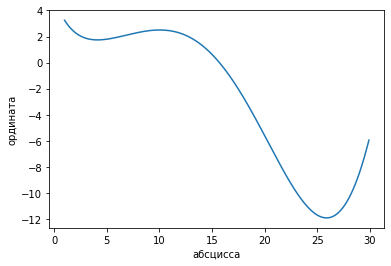

In [20]:
import matplotlib.pylab as plt
from scipy.optimize import minimize
import numpy as np

def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))
        
x = np.arange(1.0, 30.0, 0.1)
plt.plot(x, f(x))
plt.xlabel('абсцисса')
plt.ylabel('ордината')
plt.show()

Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [35]:
x0 = 30
result = minimize(f, x0)
result.x

array([25.88019321])

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [41]:
x0 = 2
result = minimize(f, x0, method = 'BFGS')
round(result.fun, 2)

1.75

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [54]:
x0 = 30
result = minimize(f, x0, method = 'BFGS')
round(result.fun, 2)
result

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

## Задача 2. Глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [57]:
from scipy.optimize import differential_evolution
bounds = [(1, 30)]
result = differential_evolution(f, bounds)
np.round(result.fun, 2)

array([-11.9])

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [58]:
result

     fun: array([-11.89889467])
     jac: array([7.10542736e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019361])

## Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

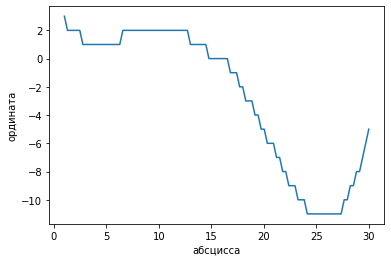

In [79]:
def h(x):
    return np.intc(f(x))
        
x = np.linspace(1, 30, num = 100)
plt.plot(x, h(x))
plt.xlabel('абсцисса')
plt.ylabel('ордината')
plt.show()

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [81]:
x0 = 30
result = minimize(h, x0, method = 'BFGS')
result.fun

array([-5], dtype=int32)

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [83]:
result = differential_evolution(h, bounds)
result.fun

-11.0

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.